In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

### Data Import

In [2]:
t = np.array([0.0000000e+00,
              2.0000000e-01,
              4.0000000e-01,
              6.0000000e-01,
              8.0000000e-01,
              1.0000000e+00,
              1.2000000e+00,
              1.4000000e+00,
              1.6000000e+00,
              1.8000000e+00,
              2.0000000e+00,
              2.2000000e+00,
              2.4000000e+00,
              2.6000000e+00,
              2.8000000e+00,
              3.0000000e+00,
              3.2000000e+00,
              3.4000000e+00,
              3.6000000e+00,
              3.8000000e+00,
              4.0000000e+00,
              4.2000000e+00,
              4.4000000e+00,
              4.6000000e+00,
              4.8000000e+00,
              5.0000000e+00,
              5.2000000e+00,
              5.4000000e+00,
              5.6000000e+00,
              5.8000000e+00,
              6.0000000e+00,
              6.2000000e+00,
              6.4000000e+00,
              6.6000000e+00,
              6.8000000e+00,
              7.0000000e+00,
              7.2000000e+00,
              7.4000000e+00,
              7.6000000e+00,
              7.8000000e+00,
              8.0000000e+00,
              8.2000000e+00,
              8.4000000e+00,
              8.6000000e+00,
              8.8000000e+00,
              9.0000000e+00,
              9.2000000e+00,
              9.4000000e+00,
              9.6000000e+00,
              9.8000000e+00,
              1.0000000e+01])

y = np.array([5.2057354e+00,
              5.1685295e+00,
              4.4693175e+00,
              3.1676415e+00,
              3.2186727e+00,
              2.7558774e+00,
              1.6360628e+00,
              7.2527756e-01,
              2.4583927e-01,
             -5.8044829e-01,
             -8.7676552e-01,
             -8.2548372e-01,
             -7.9731423e-01,
             -5.9483960e-02,
             -4.9755249e-02,
              7.0500264e-01,
              8.2600211e-01,
              1.4030590e-01,
              5.1054544e-01,
              3.8582234e-01,
              8.3860086e-01,
              4.1632982e-01,
              8.1154682e-01,
              2.3060127e-01,
              8.4177419e-01,
              3.4454159e-01,
              3.7408514e-01,
              8.6597229e-01,
              2.1207010e-01,
              7.1788999e-01,
              8.0995603e-01,
              1.0691093e+00,
              6.4850169e-01,
              1.0924844e+00,
              7.6143045e-01,
              1.2122857e+00,
              1.1772892e+00,
              8.4659501e-01,
              9.5866895e-01,
              1.8211318e+00,
              1.8015936e+00,
              1.6354389e+00,
              1.7742953e+00,
              2.5264767e+00,
              2.6522776e+00,
              3.7501151e+00,
              4.0564222e+00,
              4.6247681e+00,
              4.9123027e+00,
              5.8068946e+00,
              7.0260935e+00])

In [3]:
def bsplines(x):

# [y, yp, ypp] = bsplines(x)
#
# Computes the values and the first and second derivatives of the 13 cubic
# B-splines with breakpoints 0, 1, 2, ..., 10.
# x must be in the interval [0, 10].
#
# y:    a numpy array with the values of the 13 cubic B-splines evaluated
#       at x.
# yp:   a numpy array with the first derivatives of the 13 cubic B-splines
#       B-splines evaluated at x.
# ypp:  a numpy array with the second derivatives of the 13 cubic
#       B-splines evaluated at x.

    if x < 0 or x > 10:
        raise ValueError('x must be in [0,10].')

    # knots
    a = np.array([0,0,0,0,1,2,3,4,5,6,7,8,9,10,10,10,10])

    # 0 <= x < 10 and a(i) <= x < a(i+1) or x = 10 and i is 14.
    i = np.floor(x) + 4

    # y1, y2, y are vectors of linear, quadratic and cubic B-splines at x.
    if i == 14:
        y1 = np.zeros(11); y1[-1] = 1
        y2 = np.zeros(12); y2[-1] = 1
        y  = np.zeros(13);  y[-1] = 1
    else:
        j = int(i - 1); x = 1.0 * x;
        w1 = (x - a[j]) / (a[j+1] - a[j])
        G1 = np.array([1-w1, w1]).reshape(2,1)
        w2 = np.array([(x - a[j-1]) / (a[j+1] - a[j-1]), (x - a[j]) / (a[j+2] - a[j])])
        G2 = np.vstack((np.diag(1-w2), np.zeros((1,2)))) + np.vstack((np.zeros((1,2)), np.diag(w2)))
        w3 = np.array([(x - a[j-2]) / (a[j+1] - a[j-2]), (x - a[j-1]) / (a[j+2] - a[j-1]), (x - a[j]) / (a[j+3] - a[j])])
        G3 = np.vstack((np.diag(1-w3), np.zeros((1,3)))) + np.vstack((np.zeros((1,3)), np.diag(w3)))
        y  = np.zeros(13)
        y[j-3:j+1] = np.matmul(np.matmul(G3, G2), G1).reshape(4,)
        y2 = np.zeros(12)
        y2[j-3:j] = np.matmul(G2,G1).reshape(3,)
        y1 = np.zeros(11)
        y1[j-3:j-1] = G1.reshape(2,)

    # width of support of linear, quadratic, and cubic B-splines.
    d1 = a[4:15] - a[2:13]
    d2 = a[4:16] - a[1:13]
    d3 = a[4:17] - a[0:13]

    # derivatives of quadratic B-splines.
    y2p = np.zeros(12)
    y2p[0] = -2 * y1[0] / d1[0]
    y2p[1:11] = 2 * ( np.divide(y1[0:10], d1[0:10]) - np.divide(y1[1:11], d1[1:11]) )
    y2p[11] = 2.0 * y1[10] / d1[10]

    # derivatives of cubic B-spines
    yp = np.zeros(13)
    yp[0] = -3.0 * y2[0] / d2[0]
    yp[1:12] = 3 * ( np.divide(y2[0:11], d2[0:11]) - np.divide(y2[1:12], d2[1:12]) )
    yp[12] = 3.0 * y2[11] / d2[11]

    # second derivatives of cubic B-spines.
    ypp = np.zeros(13)
    ypp[0] = -3.0 * y2p[0] / d2[0]
    ypp[1:12] = 3 * ( np.divide(y2p[0:11], d2[0:11]) - np.divide(y2p[1:12], d2[1:12]) )
    ypp[12] = 3.0 * y2p[11] / d2[11]

    return y, yp, ypp


## Solution

In [4]:
A = []
G = []

for ti in t:
    g, gp, gpp = bsplines(ti)
    A.append(g)
    G.append(gpp)

A = np.array(A)
G = np.array(G)
b = y
h = np.zeros(len(y))

n = A.shape[1]
print(f"n = {n}")

n = 13


In [5]:
x = cp.Variable(n)
objective = cp.Minimize(cp.sum_squares(A @ x - b))
constraints = [-G @ x <= h]
prob = cp.Problem(objective, constraints)
result = prob.solve()

x_sol = x.value

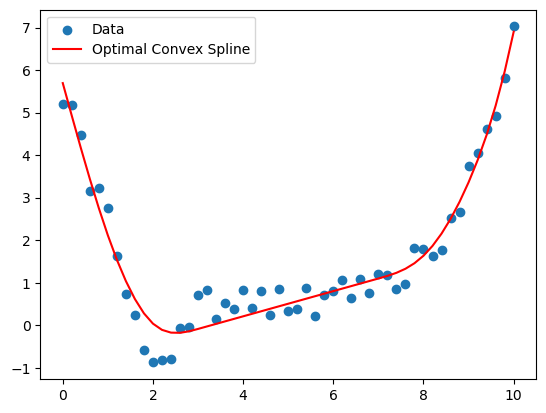

In [9]:
plt.scatter(t,y, label="Data")
plt.plot(t, A@x_sol, color="red", label="Optimal Convex Spline")
plt.legend()
plt.show()